# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [83]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing

In [84]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [85]:
df = pd.read_csv("Datasets/kidney_disease.csv")
df.dtypes
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [86]:
df = df.drop(labels=['id', 'classification'], axis=1).dropna().reset_index()
df = pd.get_dummies(df,columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])
df.dtypes

index               int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

In [87]:
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc= pd.to_numeric(df.rc, errors='coerce')
df.dtypes

index               int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

In [88]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [89]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [90]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [91]:
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 index             1.006369
age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64
New Describe:
          

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)
T

array([[  7.78191680e+00,  -5.42323904e+00],
       [  8.56621152e+00,  -3.79723102e+00],
       [  8.50863339e+00,   5.08338257e-01],
       [  1.08848197e+01,   2.28384668e+00],
       [  9.75387649e+00,  -9.13907817e-02],
       [  4.18573770e+00,  -3.43830965e+00],
       [  6.84110952e+00,   4.78353957e+00],
       [  3.86487600e+00,   3.32530490e-01],
       [  5.79814288e+00,   4.37733256e+00],
       [  2.73044965e+00,   7.97478593e-01],
       [  4.10396542e+00,   2.08007720e-01],
       [  6.53624286e+00,   2.04302521e+00],
       [  7.77148012e+00,  -5.56530857e+00],
       [  3.60899572e+00,   5.57590824e+00],
       [  3.58157897e-01,   1.95111291e+00],
       [  7.07915240e+00,   3.95520964e+00],
       [  9.10573672e+00,   3.40835460e+00],
       [  4.97797723e+00,  -9.34645835e-01],
       [  7.14370318e+00,  -1.21379126e+00],
       [  8.52619352e+00,  -4.86500937e+00],
       [  1.09697324e+00,   4.77518385e-02],
       [  1.12587243e+00,   6.49317614e-01],
       [  

Features by importance:
 [(2.921347754589616, 'ane_no'), (2.9213477545896147, 'ane_yes'), (2.711654279069221, 'bgr'), (2.6375994160728133, 'dm_yes'), (2.637599416072813, 'dm_no'), (2.575566559885221, 'pcv'), (2.559402363095121, 'hemo'), (2.524470704272682, 'su'), (2.5187121882935526, 'al'), (2.513977163954696, 'htn_yes'), (2.513977163954696, 'htn_no'), (2.449564548074449, 'cad_yes'), (2.449564548074449, 'cad_no'), (2.4045207898378598, 'appet_poor'), (2.4045207898378593, 'appet_good'), (2.4007787303474255, 'sc'), (2.3985023971267903, 'pc_normal'), (2.398502397126789, 'pc_abnormal'), (2.3790735798852984, 'bu'), (2.3200563232994975, 'sg'), (2.3100826561487584, 'rc'), (2.259195741609331, 'index'), (2.1290197369462636, 'pe_yes'), (2.1290197369462636, 'pe_no'), (2.128619301298307, 'sod'), (1.9631993976597724, 'rbc_abnormal'), (1.9631993976597721, 'rbc_normal'), (1.9350969096928887, 'ba_present'), (1.9350969096928885, 'ba_notpresent'), (1.9247782547099188, 'pcc_present'), (1.9247782547099186,

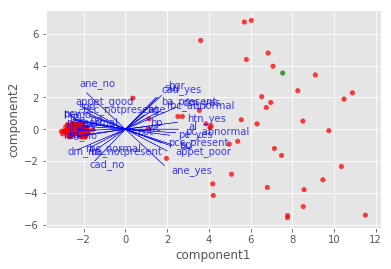

In [93]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels , alpha=0.75, ax=ax)

plt.show()

